# Navigation Tab Bar

In [2]:
import os
import pandas as pd
import sys

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(src_path)

from src import query_engines, dataframe_visualizer

q = query_engines.QueryEngines()

# Evolution of collection opened

In [4]:
QUERY_NAME = 'evolution_tap.sql' # With sql
START_DATE = "'2025-01-01'"
END_DATE = "'2026-01-01'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    QUERY_NAME
    ,params=params
    ,to_load_file=QUERY_NAME
    ,load_from_to_load_file=None
)

evolution  = q.query_run_starburst()

/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:138: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/6a1a89cca60c6857801ea138e4044c7ed3691aad121933c85541afe480b8d68f


In [5]:
# Data prepareation
evolution['vertical'].fillna('not_found', inplace=True)
pivot = evolution.pivot_table(index='p_creation_date', columns='vertical', values=['n_events','n_sessions'], aggfunc=['sum'])
pivot.columns = pivot.columns.droplevel(0)
pivot.columns = pivot.columns.map('_'.join).str.strip('_')
pivot.reset_index(inplace=True)
pivot.head()

/var/folders/sx/jzncyhtx3x57mszpcz2rnzmw0000gn/T/ipykernel_19093/635561609.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  evolution['vertical'].fillna('not_found', inplace=True)


,p_creation_date,n_events_Food,n_events_Groceries,n_events_Retail,n_events_not_found,n_sessions_Food,n_sessions_Groceries,n_sessions_Retail,n_sessions_not_found
0,2025-01-01,1577361,1286366,238336,4303,554124,180130,48430,1769
1,2025-01-02,1288008,2008135,403146,6461,457570,213041,68238,1895
2,2025-01-03,1425890,2071359,425787,7222,513504,222789,70576,2021
3,2025-01-04,1463319,2310018,455298,8482,521298,240452,73125,2333
4,2025-01-05,1571345,2225736,401989,7070,556235,246487,67342,2120


In [6]:
pivot.columns

Index(['p_creation_date', 'n_events_Food', 'n_events_Groceries',
       'n_events_Retail', 'n_events_not_found', 'n_sessions_Food',
       'n_sessions_Groceries', 'n_sessions_Retail', 'n_sessions_not_found'],
      dtype='object')

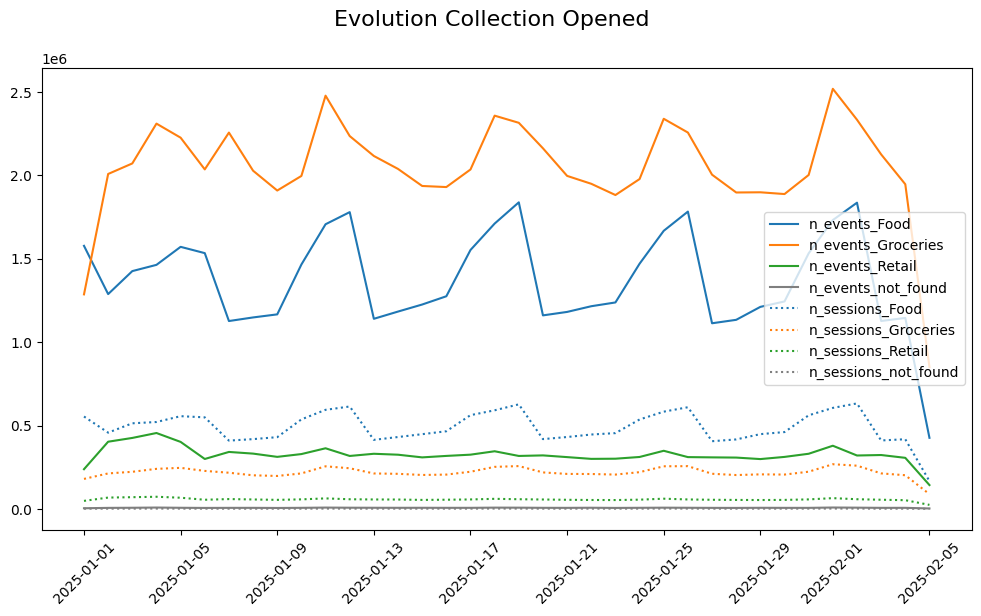

In [7]:
v = dataframe_visualizer.DataFrameVisualizer(pivot)

plot_params = [
    {
        'plot_type': 'lineplot', 
        'x_column': 'p_creation_date', 
        'y_columns': ['n_events_Food', 'n_events_Groceries', 'n_events_Retail', 'n_events_not_found', 'n_sessions_Food', 'n_sessions_Groceries', 'n_sessions_Retail', 'n_sessions_not_found'],
        'colors': ['blue', 'orange', 'green', 'gray', 'blue', 'orange', 'green', 'gray'],
        'styles': ['-','-','-','-',':',':',':',':'],
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 1, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    'title': 'Evolution Collection Opened' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

# Check on the Assumption that Collection Opened has similar volume to Navigation Impression

In [21]:
QUERY_NAME = 'assumption_co_ni.sql' # With sql
START_DATE = "'2025-01-01'"
END_DATE = "'2026-01-01'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    QUERY_NAME
    ,params=params
    ,to_load_file=QUERY_NAME
    ,load_from_to_load_file=None
)

assumption_co_ni  = q.query_run_starburst()

/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:138: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/9a5491ba73f61d0d4582c0d3175bf3a826856dab475e8a6f7b59cfd9415076fd


In [22]:
assumption_co_ni['vertical'] = assumption_co_ni['vertical'].fillna('not_found')
assumption_co_ni.fillna(0, inplace=True)
assumption_co_ni

,p_creation_date,vertical,co_n_events,co_n_sessions,ni_n_events,ni_n_sessions
0,2025-01-09,Groceries,1994338,209962,692726.0,218385.0
1,2025-01-21,not_found,8612,3048,0.0,0.0
2,2025-01-17,Food,1592498,580265,4220473.0,1459459.0
3,2025-01-19,Retail,328003,59856,183347.0,72512.0
4,2025-02-03,Groceries,2213926,227303,748287.0,232675.0
...,...,...,...,...,...,...
139,2025-02-05,not_found,3611,1312,0.0,0.0
140,2025-01-10,not_found,9008,3281,0.0,0.0
141,2025-01-14,Groceries,2129327,223066,741951.0,230594.0
142,2025-01-20,not_found,8633,2976,0.0,0.0


In [23]:
assumption_co_ni.columns

Index(['p_creation_date', 'vertical', 'co_n_events', 'co_n_sessions',
       'ni_n_events', 'ni_n_sessions'],
      dtype='object')

In [24]:
# Pivot assumption_co_ni and create a column for co_n_vents, co_n_sessions, ni_n_events, ni_n_sessions
pivot = assumption_co_ni.pivot_table(index='p_creation_date', columns='vertical', values=['co_n_events','co_n_sessions','ni_n_events','ni_n_sessions'], aggfunc=['sum'])

# Collapse the multi-level columns
pivot.columns = pivot.columns.droplevel(0)
pivot.columns = pivot.columns.map('_'.join).str.strip('_')
pivot.reset_index(inplace=True)
pivot.columns

Index(['p_creation_date', 'co_n_events_Food', 'co_n_events_Groceries',
       'co_n_events_Retail', 'co_n_events_not_found', 'co_n_sessions_Food',
       'co_n_sessions_Groceries', 'co_n_sessions_Retail',
       'co_n_sessions_not_found', 'ni_n_events_Food', 'ni_n_events_Groceries',
       'ni_n_events_Retail', 'ni_n_events_not_found', 'ni_n_sessions_Food',
       'ni_n_sessions_Groceries', 'ni_n_sessions_Retail',
       'ni_n_sessions_not_found'],
      dtype='object')

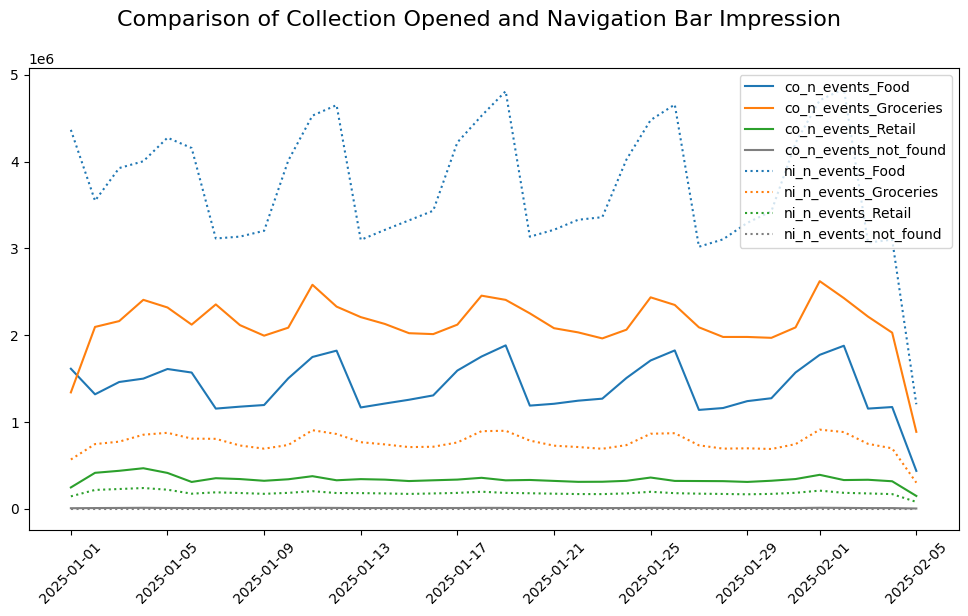

In [25]:
v = dataframe_visualizer.DataFrameVisualizer(pivot)

plot_params = [
    {
        'plot_type': 'lineplot', 
        'x_column': 'p_creation_date', 
        'y_columns': ['co_n_events_Food', 'co_n_events_Groceries', 'co_n_events_Retail', 'co_n_events_not_found', 'ni_n_events_Food', 'ni_n_events_Groceries', 'ni_n_events_Retail', 'ni_n_events_not_found'],
        'colors': ['blue', 'orange', 'green', 'gray', 'blue', 'orange', 'green', 'gray'],
        'styles': ['-','-','-','-',':',':',':',':'],
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 1, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    'title': 'Comparison of Collection Opened and Navigation Bar Impression' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

Looking at the plot we cannot approximate the Navigation Bar Impression using the Collection Opened event. Food stores do not have as many Collection Opened, and we would undercount them. Interestingly, it is the oposite case for Groceries partners, as customers navigate in more Collections inside a store, but then the Navigation Bar event is only counted once. 

Seeing this event circumstances, I will use the Navigation Impression number as a whole as the denominator. Then, I will use the Navigation Bar pressed as the numerator, and map it to a vertical using the subsequent collection opened event, which contains store address id information.

# Funnel

In [48]:
QUERY_NAME = 'funnel.sql' # With sql
START_DATE = "'2025-01-01'"
END_DATE = "'2025-02-01'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    QUERY_NAME
    ,params=params
    ,to_load_file=QUERY_NAME
    ,load_from_to_load_file=None
)

funnel  = q.query_run_starburst()
funnel.head()

/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:138: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/94193e8f78f0846b2418e6474fcd1e1d14388c2466d65925e7d6334e12f74820


,creation_date,vertical,bar_impressions_sessions_store,bar_collection_taps_sessions_store,bar_supercollection_taps_sessions_store,bar_total_taps_sessions_store
0,2025-01-10,Retail,110103,34891,5841,36813
1,2025-01-17,Groceries,351035,160915,31265,166277
2,2025-01-14,Retail,107343,34336,5937,36275
3,2025-01-22,Food,2688743,2677,3126,5282
4,2025-01-13,None,6712,1,0,1


In [49]:
funnel['vertical'] = funnel['vertical'].fillna('not_found')
funnel.fillna(0, inplace=True)
pivot = funnel.pivot_table(index='creation_date', columns='vertical', values=['bar_impressions_sessions_store'
                                                                                ,'bar_collection_taps_sessions_store'
                                                                                ,'bar_supercollection_taps_sessions_store'
                                                                                ,'bar_total_taps_sessions_store'], aggfunc=['sum'])
pivot.columns = pivot.columns.droplevel(0)
pivot.columns = pivot.columns.map('_'.join).str.strip('_')
pivot.reset_index(inplace=True)
pivot.columns

Index(['creation_date', 'bar_collection_taps_sessions_store_Food',
       'bar_collection_taps_sessions_store_Groceries',
       'bar_collection_taps_sessions_store_Retail',
       'bar_collection_taps_sessions_store_not_found',
       'bar_impressions_sessions_store_Food',
       'bar_impressions_sessions_store_Groceries',
       'bar_impressions_sessions_store_Retail',
       'bar_impressions_sessions_store_not_found',
       'bar_supercollection_taps_sessions_store_Food',
       'bar_supercollection_taps_sessions_store_Groceries',
       'bar_supercollection_taps_sessions_store_Retail',
       'bar_supercollection_taps_sessions_store_not_found',
       'bar_total_taps_sessions_store_Food',
       'bar_total_taps_sessions_store_Groceries',
       'bar_total_taps_sessions_store_Retail',
       'bar_total_taps_sessions_store_not_found'],
      dtype='object')

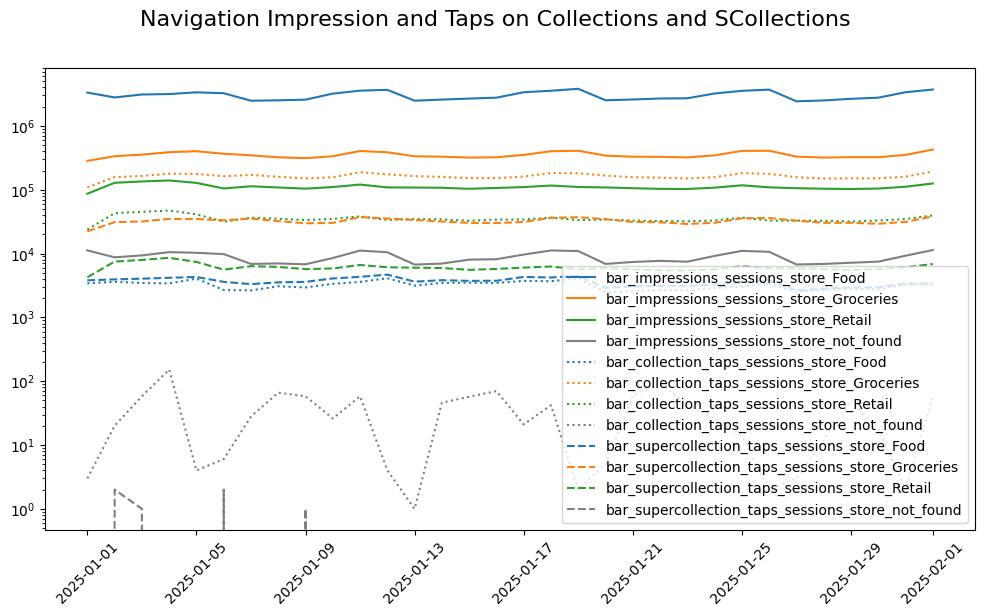

In [50]:
v = dataframe_visualizer.DataFrameVisualizer(pivot)

plot_params = [
    {
        'plot_type': 'lineplot', 
        'x_column': 'creation_date', 
        'y_columns': ['bar_impressions_sessions_store_Food', 'bar_impressions_sessions_store_Groceries', 'bar_impressions_sessions_store_Retail', 'bar_impressions_sessions_store_not_found', 
                      'bar_collection_taps_sessions_store_Food', 'bar_collection_taps_sessions_store_Groceries', 'bar_collection_taps_sessions_store_Retail', 'bar_collection_taps_sessions_store_not_found',
                      'bar_supercollection_taps_sessions_store_Food', 'bar_supercollection_taps_sessions_store_Groceries', 'bar_supercollection_taps_sessions_store_Retail', 'bar_supercollection_taps_sessions_store_not_found'],
        'colors': ['blue', 'orange', 'green', 'gray',
                   'blue', 'orange', 'green', 'gray',
                   'blue', 'orange', 'green', 'gray'],
        'styles': ['-','-','-','-',
                   ':',':',':',':',
                   '--','--','--','--'],
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 1, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    'log_axis': 'y',
    'title': 'Navigation Impression and Taps on Collections and SCollections' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

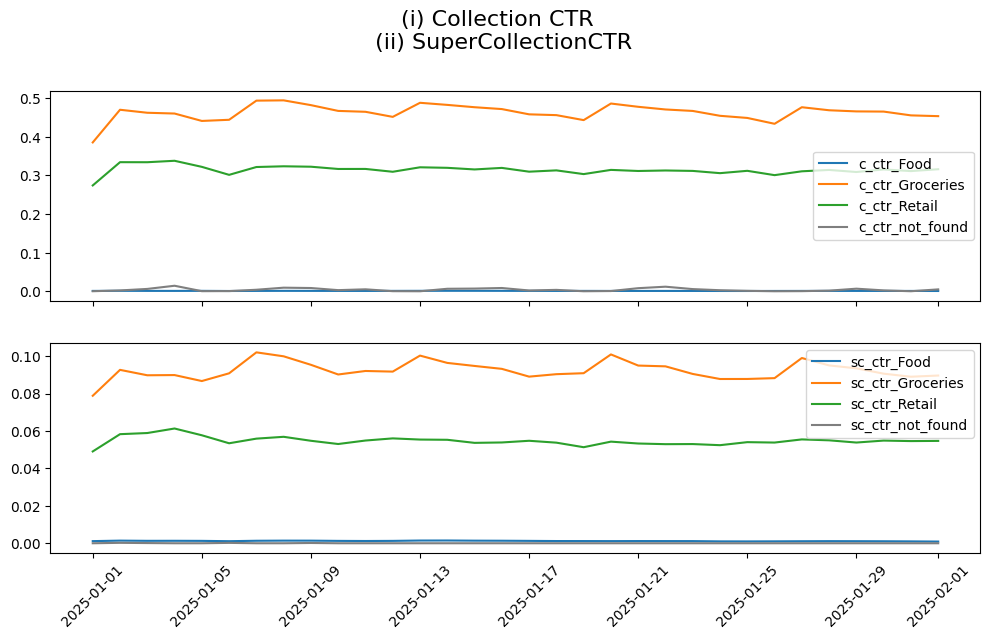

In [51]:
pivot['c_ctr_Food'] = pivot['bar_collection_taps_sessions_store_Food'] / pivot['bar_impressions_sessions_store_Food']
pivot['c_ctr_Groceries'] = pivot['bar_collection_taps_sessions_store_Groceries'] / pivot['bar_impressions_sessions_store_Groceries']
pivot['c_ctr_Retail'] = pivot['bar_collection_taps_sessions_store_Retail'] / pivot['bar_impressions_sessions_store_Retail']
pivot['c_ctr_not_found'] = pivot['bar_collection_taps_sessions_store_not_found'] / pivot['bar_impressions_sessions_store_not_found']

pivot['sc_ctr_Food'] = pivot['bar_supercollection_taps_sessions_store_Food'] / pivot['bar_impressions_sessions_store_Food']
pivot['sc_ctr_Groceries'] = pivot['bar_supercollection_taps_sessions_store_Groceries'] / pivot['bar_impressions_sessions_store_Groceries']
pivot['sc_ctr_Retail'] = pivot['bar_supercollection_taps_sessions_store_Retail'] / pivot['bar_impressions_sessions_store_Retail']
pivot['sc_ctr_not_found'] = pivot['bar_supercollection_taps_sessions_store_not_found'] / pivot['bar_impressions_sessions_store_not_found']

pivot['ctr_Food'] = pivot['bar_total_taps_sessions_store_Food'] / pivot['bar_impressions_sessions_store_Food']
pivot['ctr_Groceries'] = pivot['bar_total_taps_sessions_store_Groceries'] / pivot['bar_impressions_sessions_store_Groceries']
pivot['ctr_Retail'] = pivot['bar_total_taps_sessions_store_Retail'] / pivot['bar_impressions_sessions_store_Retail']
pivot['ctr_not_found'] = pivot['bar_total_taps_sessions_store_not_found'] / pivot['bar_impressions_sessions_store_not_found']

v = dataframe_visualizer.DataFrameVisualizer(pivot)

plot_params = [
    {
        'plot_type': 'lineplot', 
        'x_column': 'creation_date', 
        'y_columns': ['c_ctr_Food', 'c_ctr_Groceries', 'c_ctr_Retail', 'c_ctr_not_found'],
        'colors': ['blue', 'orange', 'green', 'gray'],
        'styles': ['-','-','-','-'],
        'legend': True # default True
    },
    {
        'plot_type': 'lineplot', 
        'x_column': 'creation_date', 
        'y_columns': ['sc_ctr_Food', 'sc_ctr_Groceries', 'sc_ctr_Retail', 'sc_ctr_not_found'],
        'colors': ['blue', 'orange', 'green', 'gray'],
        'styles': ['-','-','-','-'],
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 2, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    'title': '(i) Collection CTR \n (ii) SuperCollectionCTR' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

In [52]:
# Calculate the values
data = {
    'Vertical': ['Food', 'Groceries', 'Retail', 'not_found'],
    'Collection_Tap_CTR': [
        pivot['bar_collection_taps_sessions_store_Food'].sum() / pivot['bar_impressions_sessions_store_Food'].sum(),
        pivot['bar_collection_taps_sessions_store_Groceries'].sum() / pivot['bar_impressions_sessions_store_Groceries'].sum(),
        pivot['bar_collection_taps_sessions_store_Retail'].sum() / pivot['bar_impressions_sessions_store_Retail'].sum(),
        pivot['bar_collection_taps_sessions_store_not_found'].sum() / pivot['bar_impressions_sessions_store_not_found'].sum()
    ],
    'SuperCollection_Tap_CTR': [
        pivot['bar_supercollection_taps_sessions_store_Food'].sum() / pivot['bar_impressions_sessions_store_Food'].sum(),
        pivot['bar_supercollection_taps_sessions_store_Groceries'].sum() / pivot['bar_impressions_sessions_store_Groceries'].sum(),
        pivot['bar_supercollection_taps_sessions_store_Retail'].sum() / pivot['bar_impressions_sessions_store_Retail'].sum(),
        pivot['bar_supercollection_taps_sessions_store_not_found'].sum() / pivot['bar_impressions_sessions_store_not_found'].sum()
    ],
    'Total_Tap_CTR': [
        pivot['bar_total_taps_sessions_store_Food'].sum() / pivot['bar_impressions_sessions_store_Food'].sum(),
        pivot['bar_total_taps_sessions_store_Groceries'].sum() / pivot['bar_impressions_sessions_store_Groceries'].sum(),
        pivot['bar_total_taps_sessions_store_Retail'].sum() / pivot['bar_impressions_sessions_store_Retail'].sum(),
        pivot['bar_total_taps_sessions_store_not_found'].sum() / pivot['bar_impressions_sessions_store_not_found'].sum()
    ]
}

# Create a DataFrame
ctr_df = pd.DataFrame(data)

# Display the DataFrame
ctr_df


,Vertical,Collection_Tap_CTR,SuperCollection_Tap_CTR,Total_Tap_CTR
0,Food,0.001059,0.001202,0.002042
1,Groceries,0.462722,0.092285,0.477908
2,Retail,0.315410,0.054891,0.333192
3,not_found,0.003928,0.000021,0.003928


# Usage

In [53]:
QUERY_NAME = 'usage.sql' # With sql
START_DATE = "'2025-01-01'"
END_DATE = "'2025-02-01'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    QUERY_NAME
    ,params=params
    ,to_load_file=QUERY_NAME
    ,load_from_to_load_file=None
)

usage = q.query_run_starburst()
usage.head()

/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:138: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/80e1839858afdebe21569d590f511588ca96be694fcb523a6ccd407df7026bf0


,collection_taps_per_session,supercollection_taps_per_session,total_taps_per_session
0,0.563,0.157,0.721


# Collection Opened Distribution

In [58]:
QUERY_NAME = 'collection_open_distribution.sql' # With sql
START_DATE = "'2025-01-01'"
END_DATE = "'2025-02-01'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    QUERY_NAME
    ,params=params
    ,to_load_file=QUERY_NAME
    ,load_from_to_load_file=None
)

co_distrib = q.query_run_starburst()
co_distrib.head()

/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:138: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/3f6403b8e63cfe9804466c003ff5c20e803a6a386d2b2ed7a25d868ee6f2bc28


,custom_attributes__collection_opened_origin,n_events
0,Widget,6665044
1,NestedCollectionGroup,5890566
2,StoreHomeMosaic,23807735
3,CollectionGroup,37764455
4,SearchArrow,124241


In [60]:
co_distrib['n_events']
co_distrib['weight'] = co_distrib['n_events'] / co_distrib['n_events'].sum()
co_distrib

,custom_attributes__collection_opened_origin,n_events,weight
0,Widget,6665044,0.054606
1,NestedCollectionGroup,5890566,0.048261
2,StoreHomeMosaic,23807735,0.195054
3,CollectionGroup,37764455,0.309400
4,SearchArrow,124241,0.001018
5,NavigationMenu,46030905,0.377126
6,Deeplink,642466,0.005264
7,ContentExpansionButton,1131602,0.009271


# BottomReached

In [62]:
QUERY_NAME = 'bottom_reached.sql' # With sql
START_DATE = "'2025-01-01'"
END_DATE = "'2025-02-01'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    QUERY_NAME
    ,params=params
    ,to_load_file=QUERY_NAME
    ,load_from_to_load_file=None
)

bottom = q.query_run_starburst()
bottom.head()

/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:138: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/1a31f43e9aa027da116dc87710d1bf22e7743806856c68d760fb962110985d04


,vertical,n_collection_opened,n_bottom_reached,perc_bottom_reached
0,Retail,10636103,4951859,0.466
1,None,222350,5054,0.023
2,Groceries,66338751,34091507,0.514
3,Food,44859810,8686957,0.194
